# Clean GTNG Glacier Regions
Author: Ann Windnagel

Date: 3/3/2019

This notebook cleans out extraneous regions from the GTNG glacier regions shapefiles and saves a new cleaned shapefile. These data were downloaded from https://www.gtn-g.ch/data_catalogue_glacreg/.

In [1]:
import os
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
# from shapely.geometry import mapping, box
# from shapely.geometry import Point, Polygon

import earthpy as et
import earthpy.spatial as es
import earthpy.clip as cl

# set working dir
os.chdir(os.path.join(et.io.HOME, "git/wgms-glacier-project"))

In [2]:
# Open GTN-G Shapefile with the 19 glacier regions
glacier_region_shapefile_path = "data/gtn-g-glacier-regions/GTN-G_glacier_regions_201707.shp"
glacier_regions = gpd.read_file(glacier_region_shapefile_path)
glacier_regions

,FULL_NAME,RGI_CODE,WGMS_CODE,geometry
0,Alaska,1,ALA,"POLYGON ((-133 54.5, -134 54.5, -134 54, -134 ..."
1,Alaska,1,ALA,"POLYGON ((180 50, 179 50, 178 50, 177 50, 176 ..."
2,Western Canada and USA,2,WNA,"POLYGON ((-133 54.5, -132 54.5, -131 54.5, -13..."
3,"Arctic Canada, North",3,ACN,"POLYGON ((-125.000000000415 74, -125.000000000..."
4,"Arctic Canada, South",4,ACS,"POLYGON ((-90 74, -89 74, -88 74, -87 74, -86 ..."
5,Greenland Periphery,5,GRL,"POLYGON ((-75 77, -74.73 77.51000000000001, -7..."
6,Iceland,6,ISL,"POLYGON ((-26 59, -26 60, -26 61, -26 62, -26 ..."
7,Svalbard and Jan Mayen,7,SJM,"POLYGON ((-10 70, -10 71, -10 72, -10 73, -10 ..."
8,Scandinavia,8,SCA,"POLYGON ((4 70, 4 71, 4 72, 4 73, 4 74, 5 74, ..."
9,Russian Arctic,9,RUA,"POLYGON ((35 70, 35 71, 35 72, 35 73, 35 74, 3..."


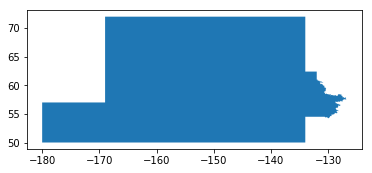

In [3]:
# There are two regions for Alaska. Plot the first one
# This one looks correct
alaska_1 = glacier_regions.iloc[0:1, :]
alaska_1.plot()

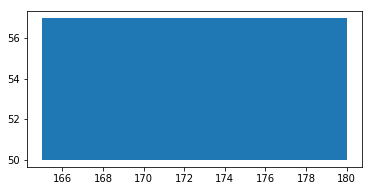

In [4]:
# There are two regions for Alaska. Plot the second one
# This one does not look correct
alaska_2 = glacier_regions.iloc[1:2, :]
alaska_2.plot()

In [5]:
# Drop the second Alaska from the dataframe and reset index
glacier_regions = glacier_regions.drop(index=1)
glacier_regions = glacier_regions.reset_index(drop=True)

In [6]:
glacier_regions

,FULL_NAME,RGI_CODE,WGMS_CODE,geometry
0,Alaska,1,ALA,"POLYGON ((-133 54.5, -134 54.5, -134 54, -134 ..."
1,Western Canada and USA,2,WNA,"POLYGON ((-133 54.5, -132 54.5, -131 54.5, -13..."
2,"Arctic Canada, North",3,ACN,"POLYGON ((-125.000000000415 74, -125.000000000..."
3,"Arctic Canada, South",4,ACS,"POLYGON ((-90 74, -89 74, -88 74, -87 74, -86 ..."
4,Greenland Periphery,5,GRL,"POLYGON ((-75 77, -74.73 77.51000000000001, -7..."
5,Iceland,6,ISL,"POLYGON ((-26 59, -26 60, -26 61, -26 62, -26 ..."
6,Svalbard and Jan Mayen,7,SJM,"POLYGON ((-10 70, -10 71, -10 72, -10 73, -10 ..."
7,Scandinavia,8,SCA,"POLYGON ((4 70, 4 71, 4 72, 4 73, 4 74, 5 74, ..."
8,Russian Arctic,9,RUA,"POLYGON ((35 70, 35 71, 35 72, 35 73, 35 74, 3..."
9,"Asia, North",10,ASN,"POLYGON ((-180 78, -179 78, -178 78, -177 78, ..."


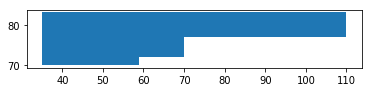

In [7]:
# Plot Russian Arctic
russia = glacier_regions.iloc[8:9, :]
russia.plot()

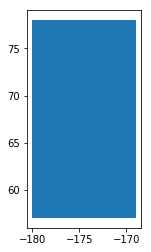

In [8]:
# There are two regions for ASia, North. Plot the first one
# This one looks incorrect
asia_1 = glacier_regions.iloc[9:10, :]
asia_1.plot()

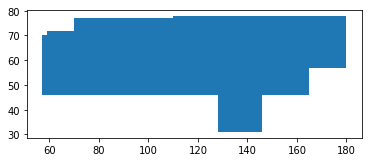

In [9]:
# There are two regions for ASia, North. Plot the second one
# This one looks correct
asia_2 = glacier_regions.iloc[10:11, :]
asia_2.plot()

In [10]:
# Drop the incorrect Asia, North
glacier_regions = glacier_regions.drop(index=9)
glacier_regions = glacier_regions.reset_index(drop=True)
glacier_regions

,FULL_NAME,RGI_CODE,WGMS_CODE,geometry
0,Alaska,1,ALA,"POLYGON ((-133 54.5, -134 54.5, -134 54, -134 ..."
1,Western Canada and USA,2,WNA,"POLYGON ((-133 54.5, -132 54.5, -131 54.5, -13..."
2,"Arctic Canada, North",3,ACN,"POLYGON ((-125.000000000415 74, -125.000000000..."
3,"Arctic Canada, South",4,ACS,"POLYGON ((-90 74, -89 74, -88 74, -87 74, -86 ..."
4,Greenland Periphery,5,GRL,"POLYGON ((-75 77, -74.73 77.51000000000001, -7..."
5,Iceland,6,ISL,"POLYGON ((-26 59, -26 60, -26 61, -26 62, -26 ..."
6,Svalbard and Jan Mayen,7,SJM,"POLYGON ((-10 70, -10 71, -10 72, -10 73, -10 ..."
7,Scandinavia,8,SCA,"POLYGON ((4 70, 4 71, 4 72, 4 73, 4 74, 5 74, ..."
8,Russian Arctic,9,RUA,"POLYGON ((35 70, 35 71, 35 72, 35 73, 35 74, 3..."
9,"Asia, North",10,ASN,"POLYGON ((128 46, 127.000000000178 46, 125.999..."


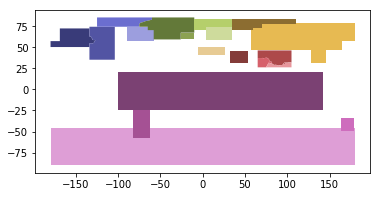

In [13]:
# Plot the new dataframe of the 19 regions each with their own color
glacier_regions.plot(cmap='tab20b')

In [14]:
# Save the new dataframe to a shapefile
cleaned_glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions.to_file(cleaned_glacier_regions_fp, driver='ESRI Shapefile')

In [16]:
# Open cleaned region shapefile to check it out
glacier_regions_cleaned = gpd.read_file(cleaned_glacier_regions_fp)
glacier_regions_cleaned

,FULL_NAME,RGI_CODE,WGMS_CODE,geometry
0,Alaska,1,ALA,"POLYGON ((-133 54.5, -134 54.5, -134 54, -134 ..."
1,Western Canada and USA,2,WNA,"POLYGON ((-133 54.5, -132 54.5, -131 54.5, -13..."
2,"Arctic Canada, North",3,ACN,"POLYGON ((-125.000000000415 74, -125.000000000..."
3,"Arctic Canada, South",4,ACS,"POLYGON ((-90 74, -89 74, -88 74, -87 74, -86 ..."
4,Greenland Periphery,5,GRL,"POLYGON ((-75 77, -74.73 77.51000000000001, -7..."
5,Iceland,6,ISL,"POLYGON ((-26 59, -26 60, -26 61, -26 62, -26 ..."
6,Svalbard and Jan Mayen,7,SJM,"POLYGON ((-10 70, -10 71, -10 72, -10 73, -10 ..."
7,Scandinavia,8,SCA,"POLYGON ((4 70, 4 71, 4 72, 4 73, 4 74, 5 74, ..."
8,Russian Arctic,9,RUA,"POLYGON ((35 70, 35 71, 35 72, 35 73, 35 74, 3..."
9,"Asia, North",10,ASN,"POLYGON ((128 46, 127.000000000178 46, 125.999..."


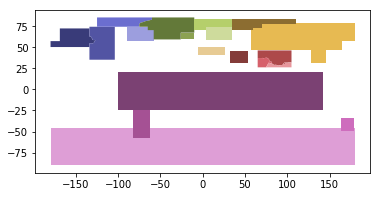

In [17]:
# Plot the new dataframe of the 19 regions each with their own color
# Looks good
glacier_regions_cleaned.plot(cmap='tab20b')